## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [75]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [76]:
# Checking the number of mice
mice_number = df_complete['Mouse ID'].nunique()
mice_number

249

In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

count_mice = df_complete.groupby(['Mouse ID']).count()['Timepoint']

mice_tp_df = pd.DataFrame({'Counts of Mouse ID': count_mice,
                        })
mice_tp_df
mice_tp_df = mice_tp_df.sort_values('Counts of Mouse ID',ascending=False)
mice_tp_df.head(5)



,Counts of Mouse ID
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10


In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = df_complete.loc[df_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
dup_mice

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
# dup_mice = df_complete.loc[df_complete.duplicated(keep=False)]
# dup_mice
# dup_mice=df_complete.loc(df_completesubset=['Mouse ID'], keep='first', inplace=True)
# dup_mice = df_complete[df_complete.duplicated(keep=False)]
# dup_mice
dup_mice = df_complete.loc[df_complete['Mouse ID']== 'g989',:]
dup_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [92]:
clean_mice = df_complete[df_complete['Mouse ID'].isin(dup_mice)==False]
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [90]:
# set the index to the mouse ID
df_mouse = df_complete.set_index('Mouse ID')

# check the mouse data for ID
df_mouse

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [95]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice['Mouse ID'].unique())

249

## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_mean= clean_mice.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_mean
drug_median= clean_mice.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_median
drug_var= clean_mice.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_var
drug_sdv=clean_mice.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_SEM=clean_mice.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


# Convert to DataFrame
df_drug = pd.DataFrame({'Mean Tumor Volume': drug_mean,
                       'Median Tumor Volume': drug_median, 
                       'Tumor Volume Variance': drug_var,
                       'Tumor Volume Stdev': drug_sdv, 
                       'Tumor Volume SEM': drug_SEM})
# # Preview DataFrame
df_drug


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary = clean_mice.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']
})
drug_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

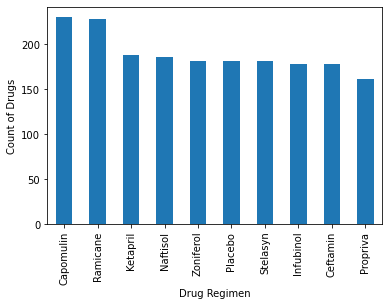

In [132]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_drug = clean_mice['Drug Regimen'].value_counts()
count_drug.plot(kind = 'bar')
plt.ylabel('Count of Drugs')
plt.xlabel('Drug Regimen')

# list of unique drug regimens
drugs = clean_mice['Drug Regimen'].value_counts()
# drug regimen as x-axis values for plotting

# drop all duplicate mice


# get mice counts per drug



In [133]:
# plot the mouse counts for each drug using pandas
count_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

<BarContainer object of 10 artists>

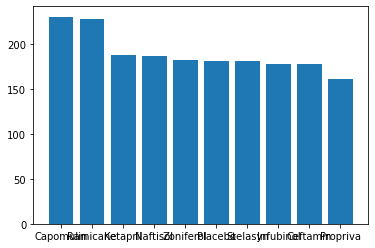

In [137]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(count_drug.index.values, count_drug.values)


<AxesSubplot:ylabel='Sex'>

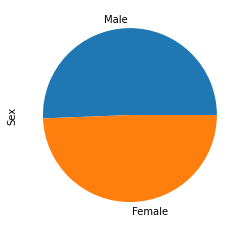

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_gender = clean_mice['Sex'].value_counts()
count_gender.plot(kind='pie')

In [135]:
count_gender

Male      958
Female    935
Name: Sex, dtype: int64

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# isolated view of just capomulin for later use


# Reset index so drug regimen column persists after inner merge


# get mouse count per drug


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice.groupby('Mouse ID')['Timepoint'].max()
last_timepoint=last_timepoint.reset_index()
last_timepoint.head()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [167]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_merge = last_timepoint.merge(clean_mice, on=['Mouse ID', 'Timepoint'], how='left')
# show all rows of data
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
clean_merge['Drug Regimen'].unique()
drug_list = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']
drug_df = clean_merge.set_index('Drug Regimen')
# Keep Capomulin, Ramicane, Infubinol, and Ceftamin
drug_df = drug_df.drop(['Placebo','Stelasyn', 'Zoniferol',
                               'Ketapril', 'Propriva','Naftisol'])
drug_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Infubinol,a203,45,67.973419,2,Female,20,23
Infubinol,a251,45,65.525743,1,Female,21,25
Ceftamin,a275,45,62.999356,3,Female,20,28
Ramicane,a411,45,38.407618,1,Male,3,22
Ramicane,a444,45,43.047543,0,Female,10,25
...,...,...,...,...,...,...,...
Ceftamin,y769,45,68.594745,4,Female,6,27
Capomulin,y793,45,31.896238,2,Male,17,17
Ceftamin,y865,45,64.729837,3,Male,23,26


In [188]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list: 
    drug_final = drug_df.loc[drug_df.index== drug, 'Tumor Volume (mm3)']
    tumor_vol.append(drug_final)
    # Determine outliers using upper and lower bounds
    drug_quartiles = drug_list.quantile([0.25, 0.5, 0.75])
    drug_quartiles
    lowerq = drug_quartiles[0.25]
    upperq = drug_quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = drug_final.loc[(drug_final < lowerbound) |( drug_final>upperbound)]
    print(f'{drug} potential outliers: {outliers}')
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol

AttributeError: 'list' object has no attribute 'quantile'

In [189]:
# Determine outliers using upper and lower bounds
drug_quartiles = drug_list.quantile([0.25, 0.5, 0.75])
drug_quartiles
lowerq = drug_quartiles[0.25]
upperq = drug_quartiles[0.75]
iqr = upperq - lowerq
lowerbound = lowerq - (1.5 * iqr)
upperbound = upperq + (1.5 * iqr)
outliers = drug_final.loc[(drug_final < lowerbound) |( drug_final>upperbound)]
print(f'{drug} potential outliers: {outliers}')

AttributeError: 'list' object has no attribute 'quantile'

In [18]:
# add subset 


# tumor volumes for each Drug Regimen


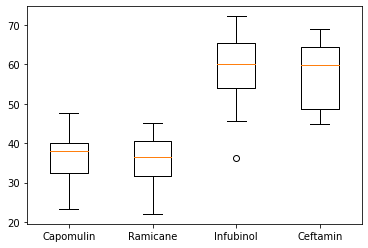

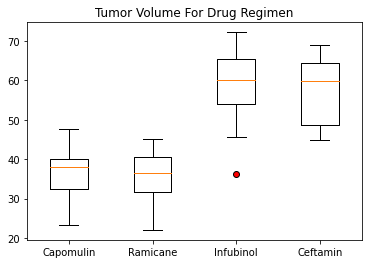

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest




## Line and Scatter Plots

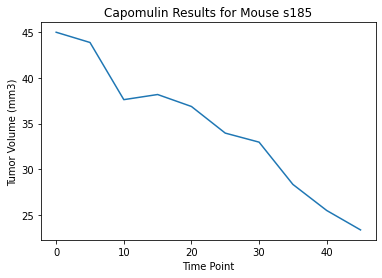

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID 

#remove other mouse IDs so only s185 shows


#set the x-axis equal to the Timepoint and y-axis to Tumor Volume


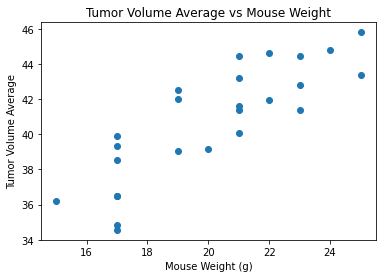

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data


## Correlation and Regression

The correlation between both factors is 0.84


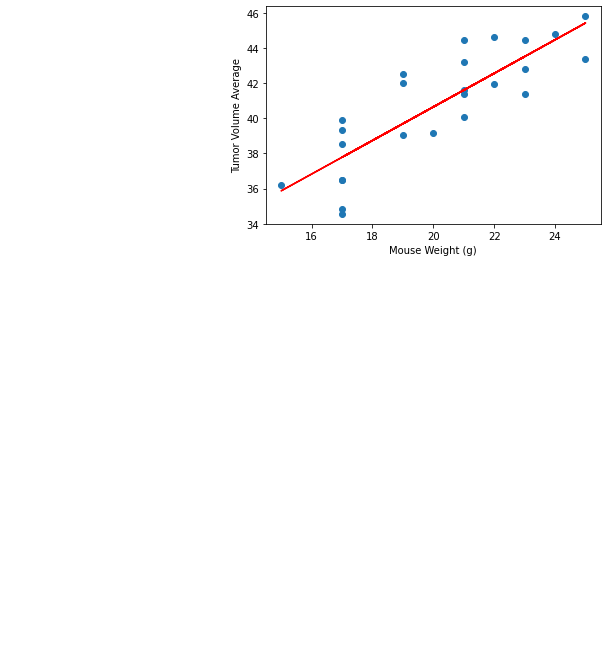

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data
